# [Clone Project for practice] EDA and Building models for predicting outflow

Work description: 

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service. 

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. Thanks to this, the task of retention will be easier to implement than the task of attracting new users, about which we do not know anything yet. 

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment. 

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

- Description of data (with calculation of basic statistics) ,
- Research of dependencies and formulation of hypotheses,
- Building models for predicting outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships,
- Comparison of the quality of the obtained models.


In the second section, there must be a justification of hypotheses, a detailed description of the identified relationships, as well as their visualization. 
In the fourth, general conclusions of the work should be formulated additionally.



**telecom_users.csv contains the following values:**


- customerID - customer id 
- gender - client gender (male / female) 
- SeniorCitizen - whether the client is a pensioner (1, 0) 
- Partner - whether the client is married (Yes, No) 
- Dependents - does the client have dependents (Yes, No) 
- tenure - how many months a person has been a client of the company 
- PhoneService - is the telephone service activated (Yes, No) 
- MultipleLines - whether multiple telephone lines are connected (Yes, No, No phone service) 
- InternetService - client's Internet provider (DSL, Fiber optic, No) 
- OnlineSecurity - is the online security service enabled (Yes, No, No internet service) 
- OnlineBackup - is the online backup service activated (Yes, No, No internet service) 
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service) 
- TechSupport - is the technical support service activated (Yes, No, No internet service) 
- StreamingTV - is the streaming TV service activated (Yes, No, No internet service) 
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service) 
- Contract - type of customer contract (Month-to-month, One year, Two year) 
- PaperlessBilling - whether the client uses paperless billing (Yes, No) 
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) 
- MonthlyCharges - current monthly payment 
- TotalCharges - the total amount that the client has paid for the services for the entire time 
- Churn - whether there was a churn (Yes or No) 

## 1. Data Description

In [2]:
import numpy as np
import pandas as pd
import math
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [4]:
data = pd.read_csv('./data/telecom_users.csv')

In [5]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the futures

<AxesSubplot:>

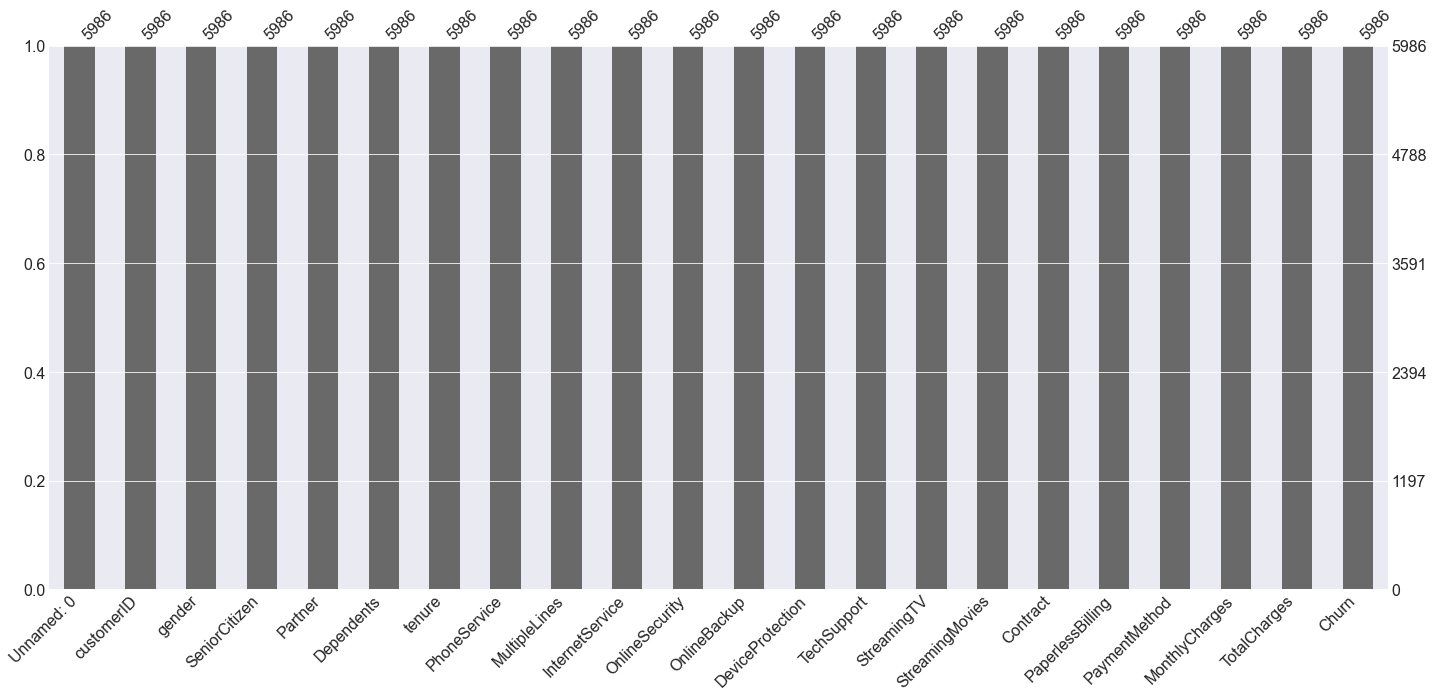

In [6]:
msno.bar(data)

Find out how many unique values are contained in the data

In [7]:
data.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

We can conclude that there are no duplicate customers in the data

Next, let's start examining each attribute of the dataset seperately and display a number of statistics for each of them

In [8]:
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [10]:
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [11]:
data.describe(include=[np.object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,9700-ZCLOT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


**Conclusions that can be drawn at the moment:**

- The difference between the sexes of clients is very small - about 50 people (male gender prevails).
- Most clients have no dependents.
- 90% of clients have a telephone service connected.
- On average, half of the clients do not use additional services.
- Half of the clients have a contract type - 'From month to month'
- More than half of customers use paperless billing.
- One third of clients have a payment method - 'Electronic check'

In [12]:
temp = data.describe(include=[np.object])

In [13]:
temp2 = temp.iloc[3]

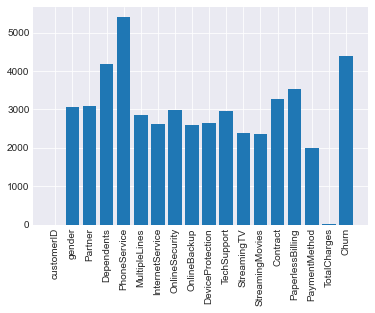

In [14]:
plt.bar(x=temp2.index, height=temp2.values, data=temp2)
plt.xticks(rotation=90);

## 2. Dependency research and formulation of hypotheses

As we can see the conclusion that there are slightly more male clients than female clients is proved on the graph

In [15]:
data['gender']

0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
5981      Male
5982    Female
5983      Male
5984      Male
5985      Male
Name: gender, Length: 5986, dtype: object

In [16]:
data['gender'].value_counts()

Male      3050
Female    2936
Name: gender, dtype: int64

In [17]:
gender = data['gender'].value_counts()

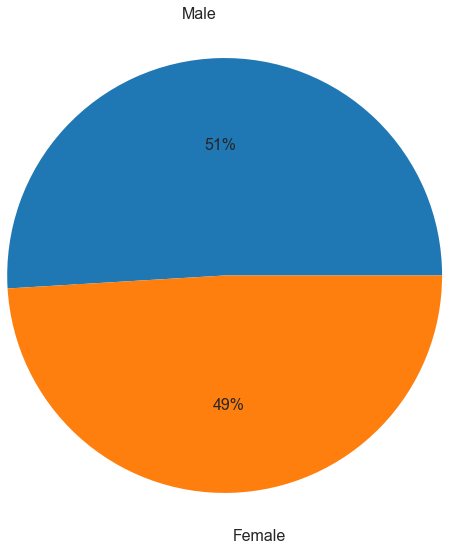

In [18]:
plt.figure(figsize=(7,5))
plot = gender.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plt.show()

Here there is about the same situation of married and unmarried a little more than married of unmarried

In [19]:
data['Partner']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982    Yes
5983    Yes
5984     No
5985     No
Name: Partner, Length: 5986, dtype: object

In [20]:
data['Partner'].value_counts()

No     3082
Yes    2904
Name: Partner, dtype: int64

In [21]:
ismarried = data['Partner'].value_counts()

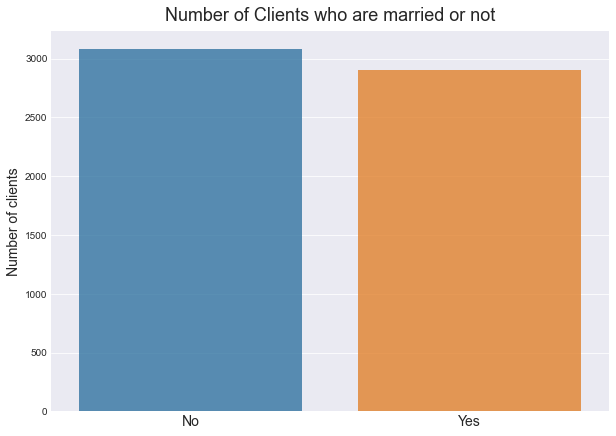

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x=ismarried.index, y=ismarried.values, alpha=0.8)
plt.title('Number of Clients who are married or not', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

In 1-2 months ~ 510 people use the services, but then it drops sharply. It can be assumed that at this time most of the clients leave

In [23]:
data['tenure']

0       72
1       44
2       38
3        4
4        2
        ..
5981     1
5982    23
5983    12
5984    12
5985    26
Name: tenure, Length: 5986, dtype: int64

In [24]:
tenure = data['tenure']

In [26]:
print(tenure.max(), tenure.min())

72 0


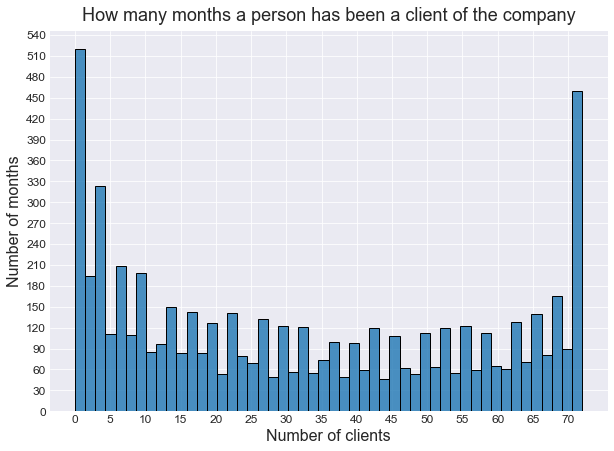

In [27]:
plt.figure(figsize=(10,7))
sns.histplot(tenure, bins=50, alpha=0.8)
plt.title('How many months a person has been a client of the company', fontsize=18, pad=10)
plt.xticks(list(range(0, tenure.max(), 5)), fontsize=12)
plt.yticks(list(range(0, 550, 30)), fontsize=12)
plt.ylabel('Number of months', fontsize=16)
plt.xlabel('Number of clients', fontsize=16)
plt.show()

The conclusion that almost all customers use a telephone connection was confirmed

In [28]:
data['PhoneService']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5981    Yes
5982    Yes
5983    Yes
5984    Yes
5985    Yes
Name: PhoneService, Length: 5986, dtype: object

In [29]:
data['PhoneService'].value_counts()

Yes    5396
No      590
Name: PhoneService, dtype: int64

In [ ]:
phone_service = data['PhoneService'].value_counts()

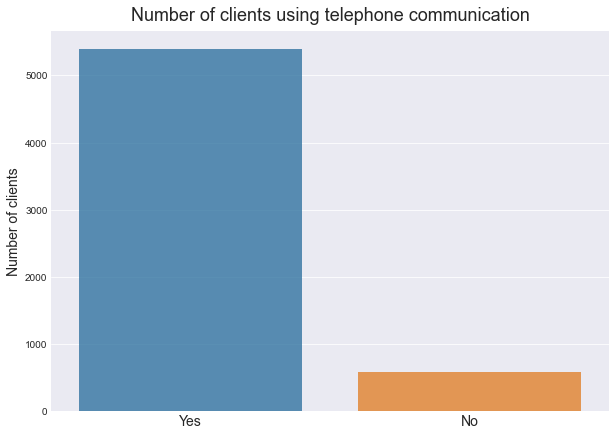

In [31]:
plt.figure(figsize=(10, 7))
sns.barplot(x=phone_service.index, y=phone_service.values, alpha=0.8)
plt.title('Number of clients using telephone communication', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

On average, half of the clients do not use additional services. About 2/3 of clients use additional services

In [35]:
other_services = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies']


In [52]:
temp = [data[obj].value_counts() for obj in other_services]

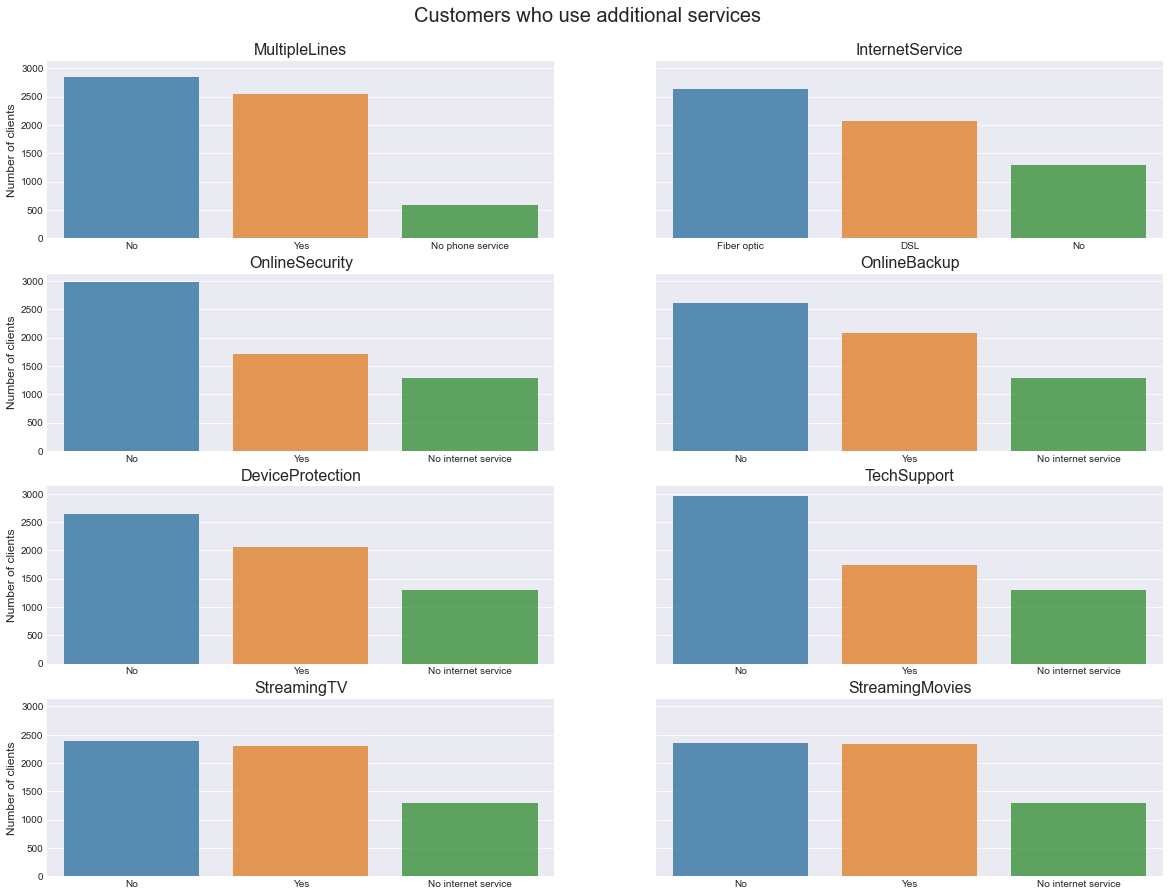

In [57]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,15), sharey=True)
t= 0

for i in range(4):
    for j in range(2):
        data_prep = [data[obj].value_counts() for obj in other_services]
        axes = ax[i][j]
        sns.barplot(x=data_prep[t].index, y=data_prep[t].values, ax=axes, alpha=0.8)
        axes.set_title(other_services[t], fontsize=16)
        axes.set_yticks(list(range(0,3001,500)))
        if j == 0:
            axes.set_ylabel('Number of clients', fontsize=12)
        t += 1
fig.suptitle('Customers who use additional services', y=0.93, fontsize=20)
plt.show()

As we can see, about half of the clients have a "From month to month" contract type, and about 1/4 each have "Two years" contract types

In [58]:
data['Contract']

0             Two year
1       Month-to-month
2       Month-to-month
3       Month-to-month
4       Month-to-month
             ...      
5981    Month-to-month
5982          Two year
5983    Month-to-month
5984    Month-to-month
5985          One year
Name: Contract, Length: 5986, dtype: object

In [60]:
data['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [61]:
contract = data['Contract'].value_counts()

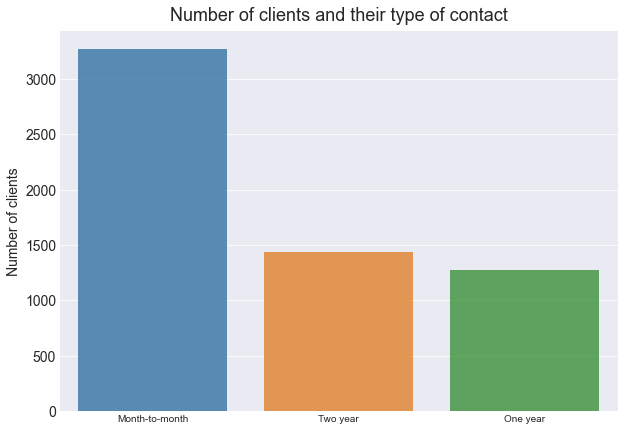

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(x=contract.index, y=contract.values, alpha=0.8)
plt.title('Number of clients and their type of contact', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=10)
plt.show()

In [72]:
data['MonthlyCharges']

0       24.10
1       88.15
2       74.95
3       55.90
4       53.45
        ...  
5981    95.00
5982    91.10
5983    21.15
5984    99.45
5985    19.80
Name: MonthlyCharges, Length: 5986, dtype: float64

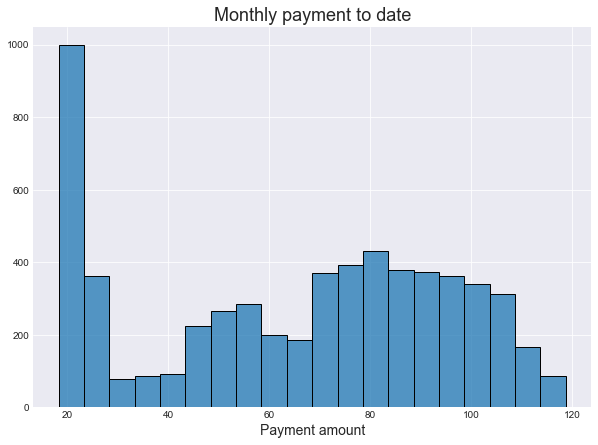

In [78]:
monthly_charges = data['MonthlyCharges']
plt.figure(figsize=(10,7))

sns.histplot(monthly_charges, bins=20).set(ylabel=None, xlabel=None)
plt.title('Monthly payment to date',fontsize=18)
plt.xlabel('Payment amount',fontsize=14)
plt.show()


Most of the clients pay for services by electronic check

In [81]:
data['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [79]:
paymentMethod = data['PaymentMethod'].value_counts()

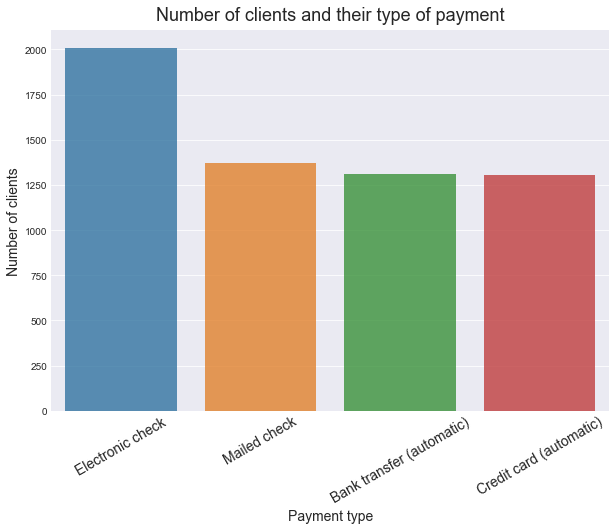

In [83]:
plt.figure(figsize=(10, 7))
sns.barplot(x=paymentMethod.index, y=paymentMethod.values, alpha=0.8)
plt.title('Number of clients and their type of payment', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xlabel('Payment type', fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=10)
plt.show()

In [84]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [92]:
data.dtypes[data.dtypes == object]

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [91]:
data.dtypes[data.dtypes == object].index

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [93]:
object_cols = list(data.dtypes[data.dtypes==object].index)

In [102]:
data['customerID']

0       7010-BRBUU
1       9688-YGXVR
2       9286-DOJGF
3       6994-KERXL
4       2181-UAESM
           ...    
5981    0684-AOSIH
5982    5982-PSMKW
5983    8044-BGWPI
5984    7450-NWRTR
5985    4795-UXVCJ
Name: customerID, Length: 5986, dtype: object

In [101]:
data['customerID'].astype('category')

0       7010-BRBUU
1       9688-YGXVR
2       9286-DOJGF
3       6994-KERXL
4       2181-UAESM
           ...    
5981    0684-AOSIH
5982    5982-PSMKW
5983    8044-BGWPI
5984    7450-NWRTR
5985    4795-UXVCJ
Name: customerID, Length: 5986, dtype: category
Categories (5986, object): [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, ..., 9987-LUTYD, 9992-RRAMN, 9992-UJOEL, 9993-LHIEB]

In [103]:
for col in object_cols:
    data[col] = data[col].astype('category')

In [105]:
cat_columns = data.select_dtypes(['category']).columns

In [109]:
data[cat_columns].apply(lambda x : x.cat.codes)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,4252,1,1,1,1,2,2,1,1,1,1,1,1,2,0,1,1066,0
1,5806,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1,2901,0
2,5577,0,1,0,1,2,1,0,0,0,0,0,0,0,1,0,2126,1
3,4243,1,0,0,1,0,0,0,0,0,0,0,2,0,1,2,1733,0
4,1270,1,0,0,1,0,0,2,0,2,0,0,0,0,0,2,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,402,1,1,0,1,0,1,2,0,0,0,2,2,0,1,2,5540,1
5982,3616,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,1561,0
5983,4858,1,1,1,1,0,2,1,1,1,1,1,1,0,1,2,2290,0
5984,4499,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,322,1


In [110]:
data[cat_columns] = data[cat_columns].apply(lambda x : x.cat.codes)

In [111]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,4252,1,0,1,1,72,1,2,2,...,1,1,1,1,2,0,1,24.10,1066,0
1,4528,5806,0,0,0,0,44,1,0,1,...,2,0,2,0,0,1,1,88.15,2901,0
2,6344,5577,0,1,1,0,38,1,2,1,...,0,0,0,0,0,1,0,74.95,2126,1
3,6739,4243,1,0,0,0,4,1,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,432,1270,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,402,1,0,1,0,1,1,0,1,...,0,0,2,2,0,1,2,95.00,5540,1
5982,5191,3616,0,0,1,1,23,1,2,0,...,2,2,2,2,2,1,1,91.10,1561,0
5983,5226,4858,1,0,1,1,12,1,0,2,...,1,1,1,1,0,1,2,21.15,2290,0
5984,5390,4499,1,1,0,0,12,1,2,1,...,2,0,2,2,0,1,2,99.45,322,1


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   int16  
 2   gender            5986 non-null   int8   
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   int8   
 5   Dependents        5986 non-null   int8   
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   int8   
 8   MultipleLines     5986 non-null   int8   
 9   InternetService   5986 non-null   int8   
 10  OnlineSecurity    5986 non-null   int8   
 11  OnlineBackup      5986 non-null   int8   
 12  DeviceProtection  5986 non-null   int8   
 13  TechSupport       5986 non-null   int8   
 14  StreamingTV       5986 non-null   int8   
 15  StreamingMovies   5986 non-null   int8   
 16  Contract          5986 non-null   int8   


In [112]:
# Define train and test datasets for training
drop_elements = ['Unnamed: 0', 'customerID', 'Churn']
train = data.drop(drop_elements, axis=1)
test = data['Churn']

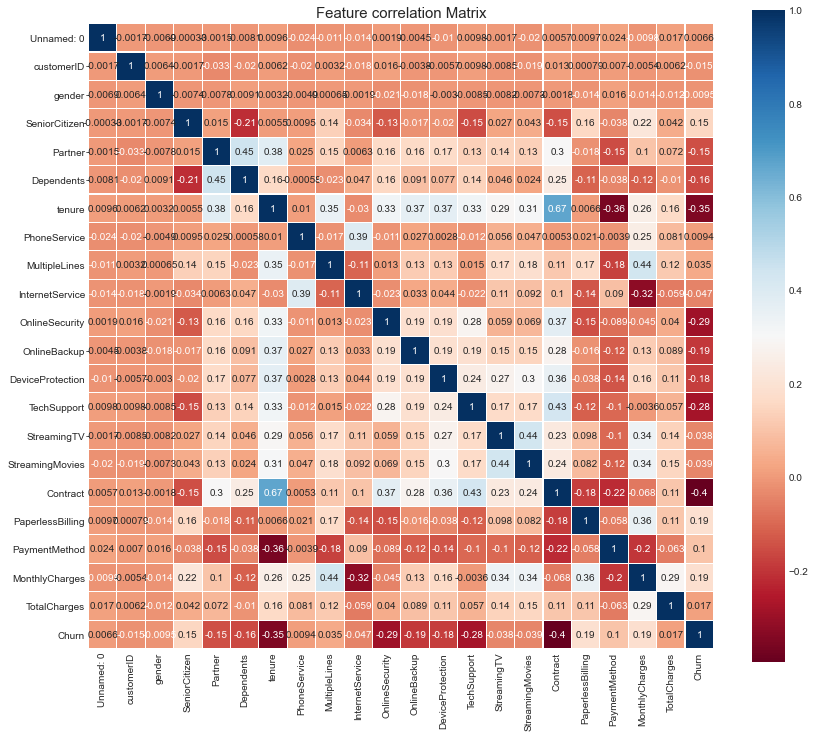

In [113]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Feature correlation Matrix', y=1, size=15)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [117]:
corr_train = data.corr()

In [118]:
corr_train

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.001745,-0.006931,-0.000331,-0.001498,-0.008081,0.009620,-0.024496,-0.011430,-0.013718,...,-0.010189,0.009791,-0.001738,-0.019630,0.005654,0.009736,0.023577,-0.009830,0.017044,0.006630
customerID,-0.001745,1.000000,0.006424,-0.001659,-0.033431,-0.020291,0.006155,-0.020107,0.003231,-0.018282,...,-0.005727,0.009835,-0.008514,-0.019300,0.013109,0.000792,0.006979,-0.005440,0.006225,-0.014888
gender,-0.006931,0.006424,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,0.000654,-0.001858,...,-0.003010,-0.008468,-0.008193,-0.007297,-0.001843,-0.013990,0.015745,-0.014286,-0.011860,-0.009548
SeniorCitizen,-0.000331,-0.001659,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.135743,-0.033614,...,-0.019911,-0.152474,0.026869,0.042940,-0.149406,0.155691,-0.037653,0.219387,0.041596,0.150097
Partner,-0.001498,-0.033431,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,0.147910,0.006319,...,0.165875,0.133171,0.143919,0.134082,0.300549,-0.018037,-0.151566,0.104006,0.072476,-0.146840
Dependents,-0.008081,-0.020291,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.023180,0.046719,...,0.077105,0.139518,0.046075,0.023928,0.246163,-0.112405,-0.038302,-0.115803,-0.010098,-0.160204
tenure,0.009620,0.006155,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.350499,-0.030184,...,0.372424,0.326081,0.292981,0.307437,0.671551,0.006569,-0.359652,0.256983,0.160293,-0.348469
PhoneService,-0.024496,-0.020107,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,-0.017479,0.390024,...,0.002764,-0.012189,0.055582,0.047035,0.005267,0.021340,-0.003853,0.251029,0.081162,0.009421
MultipleLines,-0.011430,0.003231,0.000654,0.135743,0.147910,-0.023180,0.350499,-0.017479,1.000000,-0.106981,...,0.126047,0.015052,0.170890,0.184659,0.113906,0.169703,-0.176295,0.436869,0.118301,0.034943
InternetService,-0.013718,-0.018282,-0.001858,-0.033614,0.006319,0.046719,-0.030184,0.390024,-0.106981,1.000000,...,0.044264,-0.021814,0.105667,0.091993,0.100796,-0.137651,0.089963,-0.320206,-0.059210,-0.047198


In [119]:
corr_train['Churn']

Unnamed: 0          0.006630
customerID         -0.014888
gender             -0.009548
SeniorCitizen       0.150097
Partner            -0.146840
Dependents         -0.160204
tenure             -0.348469
PhoneService        0.009421
MultipleLines       0.034943
InternetService    -0.047198
OnlineSecurity     -0.290306
OnlineBackup       -0.193851
DeviceProtection   -0.180120
TechSupport        -0.277261
StreamingTV        -0.037609
StreamingMovies    -0.039100
Contract           -0.396446
PaperlessBilling    0.188996
PaymentMethod       0.103927
MonthlyCharges      0.186753
TotalCharges        0.016573
Churn               1.000000
Name: Churn, dtype: float64

In [120]:
corr_train['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.188996
MonthlyCharges      0.186753
SeniorCitizen       0.150097
PaymentMethod       0.103927
MultipleLines       0.034943
TotalCharges        0.016573
PhoneService        0.009421
Unnamed: 0          0.006630
gender             -0.009548
customerID         -0.014888
StreamingTV        -0.037609
StreamingMovies    -0.039100
InternetService    -0.047198
Partner            -0.146840
Dependents         -0.160204
DeviceProtection   -0.180120
OnlineBackup       -0.193851
TechSupport        -0.277261
OnlineSecurity     -0.290306
tenure             -0.348469
Contract           -0.396446
Name: Churn, dtype: float64

In [121]:
Churn = pd.DataFrame(corr_train['Churn'].sort_values(ascending=False))

In [122]:
Churn

,Churn
Churn,1.000000
PaperlessBilling,0.188996
MonthlyCharges,0.186753
SeniorCitizen,0.150097
PaymentMethod,0.103927
MultipleLines,0.034943
TotalCharges,0.016573
PhoneService,0.009421
Unnamed: 0,0.006630
gender,-0.009548


<AxesSubplot:>

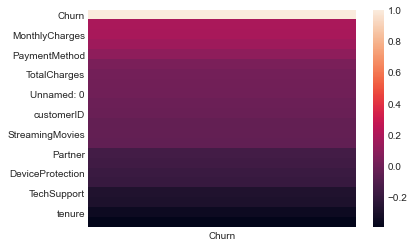

In [123]:
sns.heatmap(Churn)

## 3. Building models to predict outflow

In [124]:
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict
                                    )
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score

In [125]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [126]:
skf = StratifiedKFold(n_splits=5)

gbc = GradientBoostingClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=17)

XGBClassifier

In [127]:
xgb_model = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3,
                          min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571,
                          subsample=0.5213, random_state=7, nthread =-1
                         )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [128]:
y_pred = xgb_model.predict(X_test)

In [129]:
confusion_matrix(y_test, y_pred)

array([[778, 105],
       [149, 166]])

In [130]:
accuracy_score(y_test, y_pred)

0.7879799666110183

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       883
           1       0.61      0.53      0.57       315

    accuracy                           0.79      1198
   macro avg       0.73      0.70      0.71      1198
weighted avg       0.78      0.79      0.78      1198



In [132]:
xgb_model_basic = XGBClassifier()
xgb_model_basic.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
y_pred = xgb_model_basic.predict(X_test)

In [134]:
confusion_matrix(y_test, y_pred)

array([[778, 105],
       [160, 155]])

In [135]:
accuracy_score(y_test, y_pred)

0.7787979966611018

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       883
           1       0.60      0.49      0.54       315

    accuracy                           0.78      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.77      0.78      0.77      1198



Stacking

In [137]:
rfc_params = {
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [141]:
# CV_rfc = GridSearchCV(rfc, rfc_params, scoring='roc_auc', cv=skf)

# CV_rfc.fit(X_train, y_train)

# rfc_best_params = CV_rfc.best_params_

In [142]:
rfc_best_params = {'criterion': 'gini',
    'max_depth': 7,
    'max_features': 'auto',
    'n_estimators': 500}

In [143]:
gbc_params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth': [3,5,8],
    'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    }

In [144]:
# CV_gbc = GridSearchCV(gbc, gbc_params, scoring='roc_auc', cv=skf)
# CV_gbc.fit(X_train, y_train)
# gbc_best_params = CV_gbc.best_params_

In [145]:
gbc_best_params = {'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.618}

In [146]:
svc_params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [147]:
# CV_svc = GridSearchCV(svc, svc_params, scoring='roc_auc', cv=skf)
# CV_svc.fit(X_train, y_train)
# svc_best_params = CV_svc.best_params_

In [148]:
svc_best_params = {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [149]:
ada_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

In [150]:
# CV_ada = GridSearchCV(ada, ada_params, scoring='roc_auc', cv=skf)
# CV_ada.fit(X_train, y_train)
# ada_best_params = CV_ada.best_params_

In [151]:
ada_best_params = {'learning_rate': 0.1, 'n_estimators': 200}

In [152]:
gbc_model = GradientBoostingClassifier(**gbc_best_params, random_state=42)
rfc_model = RandomForestClassifier(**rfc_best_params, random_state=42)
svc_model = SVC(**svc_best_params, random_state=42)
ada_model = AdaBoostClassifier(**ada_best_params, random_state=42)

In [153]:
meta = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =42, nthread = -1)

In [154]:
models = [('gbc', gbc_model), ('rf', rfc_model), ('svc', svc_model), ('ada', ada_model)]

In [155]:
stacking_clf = StackingClassifier(models, meta, cv=skf)

In [156]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7FEF3699D9E0, shuffle=False),
                   estimators=[('gbc',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           random_state=42,
                                                           subsample=0.618)),
                               ('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('svc',
                                SVC(C=100, gamma=0.0001, random_state=42)),
                               ('ada',
                                AdaBoo...
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
    

In [157]:
y_pred2 = stacking_clf.predict(X_test)

In [158]:
stacking_clf.score(X_test, y_test)

0.7813021702838063

In [159]:
accuracy_score(y_test,y_pred2)

0.7813021702838063

In [160]:
confusion_matrix(y_test, y_pred2)

array([[781, 102],
       [160, 155]])

In [161]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       883
           1       0.60      0.49      0.54       315

    accuracy                           0.78      1198
   macro avg       0.72      0.69      0.70      1198
weighted avg       0.77      0.78      0.77      1198

